## MODEL TRAINNING

In [19]:
# pip install scikit-learn
# pip install catboost
# pip install xgboost

In [40]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [21]:
df=pd.read_csv('stud.csv')

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
# Preparing Independent & Dependent Feature
X=df.drop(columns=['math_score'],axis=1)

In [24]:
y=df['math_score']

In [25]:
print("Categories in 'Gender' variable :  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable :  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'prarental_level_of_education' variable :  ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable :  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable :  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'Gender' variable :   ['female' 'male']
Categories in 'race_ethnicity' variable :   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'prarental_level_of_education' variable :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :   ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable :   ['none' 'completed']


In [26]:
# create a Column transfer ith a types of TRANSFORMER
num_feature=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transform=StandardScaler()
oh_transform=OneHotEncoder()

preprocessor=ColumnTransformer(    # Creating a PIPELINE 
    [
        ("onehotencoder",oh_transform,cat_features),
        ("StanderScaler",num_transform,num_feature)
    ]
)

In [27]:
X=preprocessor.fit_transform(X)

In [28]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 151)>
  Coords	Values
  (0, 44)	1.0
  (0, 122)	1.0
  (0, 149)	0.19399858403803502
  (0, 150)	0.3914918076496706
  (1, 62)	1.0
  (1, 136)	1.0
  (1, 149)	1.4274759816659497
  (1, 150)	1.3132686840532009
  (2, 67)	1.0
  (2, 141)	1.0
  (2, 149)	1.7701085921181483
  (2, 150)	1.6424747113401759
  (3, 29)	1.0
  (3, 92)	1.0
  (3, 149)	-0.8338992473185606
  (3, 150)	-1.5837443560721798
  (4, 50)	1.0
  (4, 123)	1.0
  (4, 149)	0.6051577165806732
  (4, 150)	0.45733301310706564
  (5, 55)	1.0
  (5, 126)	1.0
  (5, 149)	0.9477903270328718
  (5, 150)	0.6548566294792506
  (6, 67)	1.0
  :	:
  (993, 150)	0.3914918076496706
  (994, 35)	1.0
  (994, 110)	1.0
  (994, 149)	-0.4227401147759223
  (994, 150)	-0.39860265783906956
  (995, 70)	1.0
  (995, 143)	1.0
  (995, 149)	2.044214680479907
  (995, 150)	1.774157122254966
  (996, 27)	1.0
  (996, 103)	1.0
  (996, 149)	-0.97095229149944
  (996, 150)	-0.85949109604083

In [29]:
X.shape

(1000, 151)

In [30]:
# Separate Dataset int Train & Test : 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Create an Evaluate Function to give all metrics after model trainning

In [39]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2score = r2_score(true, predicted)

    return mae, rmse, r2score


In [32]:
models = {
    "Linear Rgression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbours Regreeesor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBOOSTING Regressor": XGBRegressor(),
    "Catboosting Regressor": CatBoostRegressor(verbose=False),
    "Adaboosting Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(
        y_train, y_train_pred
    )
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(
        y_test, y_test_pred
    )

    # Print model name
    print(model_name)

    print("Model performance for Training set")
    print("- MAE : {:.4f}".format(model_train_mae))
    print("- RMSE: {:.4f}".format(model_train_rmse))
    print("- R2  : {:.4f}".format(model_train_r2))

    print("----------------------------------")

    print("Model performance for Testing set")
    print("- MAE : {:.4f}".format(model_test_mae))
    print("- RMSE: {:.4f}".format(model_test_rmse))
    print("- R2  : {:.4f}".format(model_test_r2))

    # Store results
    model_list.append(model_name)
    r2_list.append(model_test_r2)

    print("=" * 35, "\n")


Linear Rgression
Model performance for Training set
- MAE : 6.2872
- RMSE: 7.8301
- R2  : 0.7280
----------------------------------
Model performance for Testing set
- MAE : 7.9516
- RMSE: 9.7757
- R2  : 0.6073

Lasso
Model performance for Training set
- MAE : 6.9821
- RMSE: 8.6808
- R2  : 0.6658
----------------------------------
Model performance for Testing set
- MAE : 7.3635
- RMSE: 8.8751
- R2  : 0.6763

Ridge
Model performance for Training set
- MAE : 6.3800
- RMSE: 7.8737
- R2  : 0.7250
----------------------------------
Model performance for Testing set
- MAE : 7.6834
- RMSE: 9.3038
- R2  : 0.6443

K-Neighbours Regreeesor
Model performance for Training set
- MAE : 6.0245
- RMSE: 7.4927
- R2  : 0.7510
----------------------------------
Model performance for Testing set
- MAE : 7.9180
- RMSE: 9.9564
- R2  : 0.5926

Decision Tree
Model performance for Training set
- MAE : 2.9427
- RMSE: 4.9302
- R2  : 0.8922
----------------------------------
Model performance for Testing set
- MA

In [33]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['model_name', 'r2_score'])

,model_name,r2_score
0,Linear Rgression,0.607276
1,Lasso,0.676304
2,Ridge,0.644280
3,K-Neighbours Regreeesor,0.592625
4,Decision Tree,0.417793
5,Random Forest Regressor,0.566310
6,XGBOOSTING Regressor,0.537276
7,Catboosting Regressor,0.625026
8,Adaboosting Regressor,0.671976


# LASSO REG.

In [37]:
# Beacuse it has the highest accuracy

lasso_model = Lasso(fit_intercept=True)
lasso_model = lasso_model.fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(" ACCURACY OF THE LASSO MODEL IS: %.2f" %score)

 ACCURACY OF THE LASSO MODEL IS: 67.63


## LINEAR REG.

In [38]:

linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(" ACCURACY OF THE LINEAR MODEL IS: %.2f" %score)

 ACCURACY OF THE LINEAR MODEL IS: 60.73


## PLOT y_pred & y_test

Text(0, 0.5, 'Predicted')

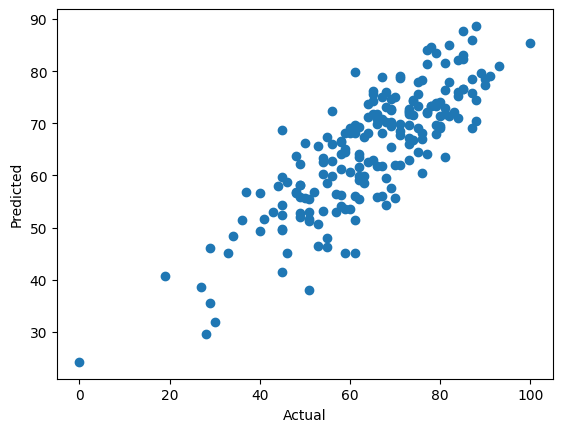

In [35]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

## DIFFERENCE BETWEEN Actual & Predicted Values

In [36]:
pred_df=pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Values,Predicted Values,Difference
521,91,79.065573,11.934427
737,53,65.666143,-12.666143
740,80,69.198002,10.801998
660,74,71.591387,2.408613
411,84,76.017092,7.982908
...,...,...,...
408,52,56.759452,-4.759452
332,62,55.504541,6.495459
208,74,74.462273,-0.462273
613,65,71.830138,-6.830138


## To save all this code in GIT we need to write  -:

* git add .            (Stage all files)
* git status           ( to check staged files in git)
* git commit -m "EDA & PROBLEM STATEMENT"   (to Commit) 
* git push -u origin main        (push to github)